In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing dataset
df = pd.read_csv('50_Startups.csv')


In [3]:
#Let's explore the top 5 rows
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There are no null values in the data set

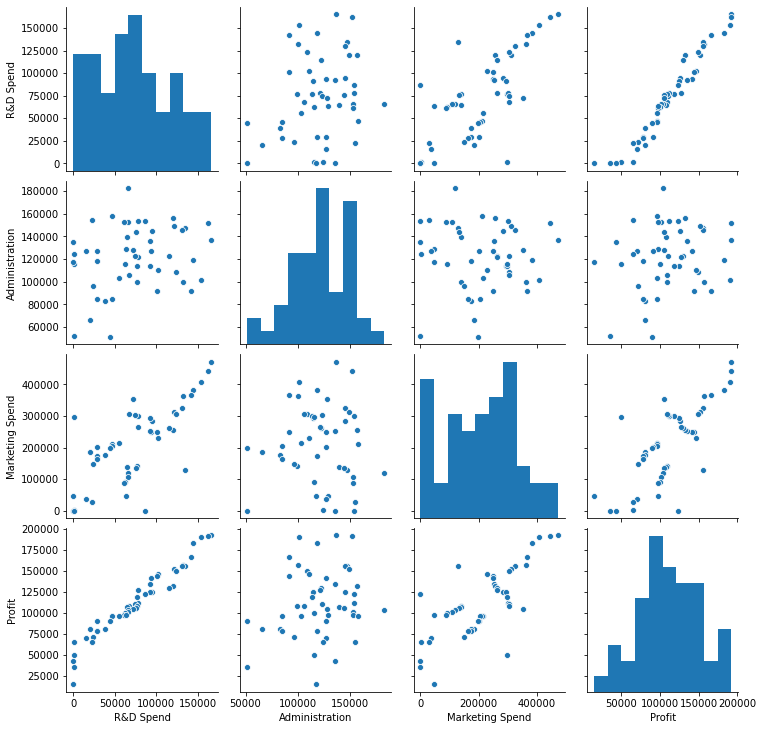

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
#Reducing the numeric digits - convert to lakhs

df[['R&D Spend','Administration','Marketing Spend','Profit']]=df[['R&D Spend','Administration','Marketing Spend','Profit']].apply(lambda x:x/100000)

In [9]:

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.653492,1.368978,4.717841,New York,1.922618
1,1.625977,1.513776,4.438985,California,1.917921
2,1.534415,1.011456,4.079345,Florida,1.910504
3,1.443724,1.186719,3.831996,New York,1.829020
4,1.421073,0.913918,3.661684,Florida,1.661879


In [10]:
#create dummies - (0,1) - New York (1,0)- Florida (0,0)-California
states = pd.get_dummies(df['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [11]:
# concat states with df

df = pd.concat([df, states], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,1.653492,1.368978,4.717841,New York,1.922618,0,1
1,1.625977,1.513776,4.438985,California,1.917921,0,0
2,1.534415,1.011456,4.079345,Florida,1.910504,1,0
3,1.443724,1.186719,3.831996,New York,1.829020,0,1
4,1.421073,0.913918,3.661684,Florida,1.661879,1,0


In [12]:
df.drop('State', axis=1)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,1.653492,1.368978,4.717841,1.922618,0,1
1,1.625977,1.513776,4.438985,1.917921,0,0
2,1.534415,1.011456,4.079345,1.910504,1,0
3,1.443724,1.186719,3.831996,1.829020,0,1
4,1.421073,0.913918,3.661684,1.661879,1,0
5,1.318769,0.998147,3.628614,1.569911,0,1
6,1.346155,1.471989,1.277168,1.561225,0,0
7,1.302981,1.455301,3.238767,1.557526,1,0
8,1.205425,1.487190,3.116133,1.522118,0,1
9,1.233349,1.086792,3.049816,1.497600,0,0


In [13]:
# sns.pairplot(df1, x_vars=['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York'], y_vars='Profit',size=4, aspect=1, kind='scatter')
# plt.show()


In [14]:
# Standardisation

In [15]:
# Simple linear regression of R&D vs profit 
# X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York']]
# y = df['Profit']


In [16]:
#Test train split

from sklearn.model_selection import train_test_split
df_train, df_test  = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
df_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
25,0.646647,1.395532,1.379626,California,1.074043,0,0
26,0.753289,1.441360,1.340501,Florida,1.057335,1,0
35,0.460140,0.850474,2.055176,New York,0.964795,0,1
17,0.946572,1.450776,2.825743,New York,1.253704,0,1
7,1.302981,1.455301,3.238767,Florida,1.557526,1,0


In [18]:
df_test.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
6,1.346155,1.471989,1.277168,California,1.561225,0,0
36,0.286638,1.270562,2.011268,Florida,0.907082,1,0
37,0.440699,0.512831,1.970294,California,0.899491,0,0
28,0.660515,1.826456,1.181482,Florida,1.032824,1,0
43,0.155057,1.273823,0.355342,New York,0.697590,0,1


In [19]:
# from sklearn.preprocessing import MinMaxScaler

In [20]:
# scaler = MinMaxScaler()

In [21]:
# # Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# num_vars = ['R&D Spend', 'Administration', 'Marketing Spend']

# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
25,0.646647,1.395532,1.379626,California,1.074043,0,0
26,0.753289,1.441360,1.340501,Florida,1.057335,1,0
35,0.460140,0.850474,2.055176,New York,0.964795,0,1
17,0.946572,1.450776,2.825743,New York,1.253704,0,1
7,1.302981,1.455301,3.238767,Florida,1.557526,1,0


profit and R&D seem to be linearly correlated

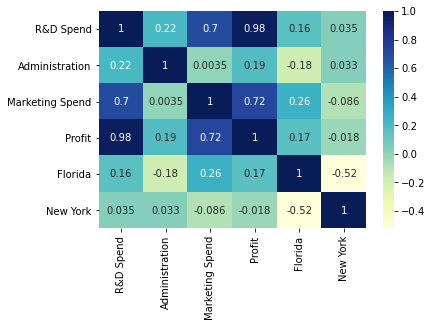

In [23]:
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [24]:
# Dividing train set into x and y
y_train = df_train.pop('Profit')
X_train = df_train

In [25]:
#Building a linear model
import statsmodels.api as sm

In [26]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['R&D Spend','Administration','Marketing Spend', 'Florida','New York']])

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [27]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const              0.508884
R&D Spend          0.840872
Administration    -0.027943
Marketing Spend    0.022766
Florida           -0.032848
New York          -0.052913
dtype: float64

In [28]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.87e-20
Time:                        20:06:45   Log-Likelihood:                 43.684
No. Observations:                  35   AIC:                            -75.37
Df Residuals:                      29   BIC:                            -66.04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5089      0.074     

coefficient for R&D spend is 0.46, with a very low p value (~0)
The coefficient is statistically significant. \\

Adjusted R-squared value is 0.96
Meaning that 96% of the variance in Profit is explained by the model\\

F statistic has a very low p value. The model fit is statistically significant.

However, it is important to note that the p-values of administration, New York, Florida co-efficients are very high which affects the explainability of the model. Next, we will build a model, removing this feature


In [29]:
#This model has been bulit by dropping all three features together. This is not the right way. You need drop it one by one (feature with the highest p-value)
#and check the model statistics

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train[['R&D Spend','Marketing Spend']])

# Fit the resgression line using 'OLS'
lr_2 = sm.OLS(y_train, X_train_sm).fit()

In [30]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_2.params

const              0.452123
R&D Spend          0.824511
Marketing Spend    0.025181
dtype: float64

In [31]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     419.5
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.10e-23
Time:                        20:06:45   Log-Likelihood:                 42.092
No. Observations:                  35   AIC:                            -78.18
Df Residuals:                      32   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4521      0.029     

R-squared value didn't improve but the  coefficient of marketing spend still has a high p-value. Hence, we will remove that feature and build the next model.

In [32]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train['R&D Spend'])

# Fit the resgression line using 'OLS'
lr_3 = sm.OLS(y_train, X_train_sm).fit()

In [33]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_3.params

const        0.468233
R&D Spend    0.873932
dtype: float64

In [34]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     792.2
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.20e-24
Time:                        20:06:45   Log-Likelihood:                 40.609
No. Observations:                  35   AIC:                            -77.22
Df Residuals:                      33   BIC:                            -74.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4682      0.028     16.971      0.0

Model is statistically significant. Equation becomes $ Profit = 0.468 + 0.873* R&D spend $

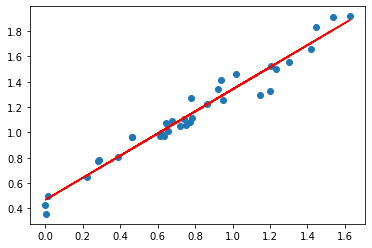

In [35]:
#visulaising the model

plt.scatter(X_train['R&D Spend'], y_train)
plt.plot(X_train['R&D Spend'], 0.468 + 0.873*X_train['R&D Spend'], 'r')
plt.show()

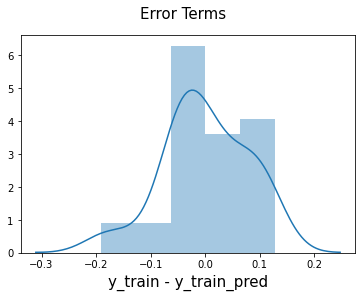

In [36]:
#Residual analysis

y_train_pred = lr_3.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 5)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

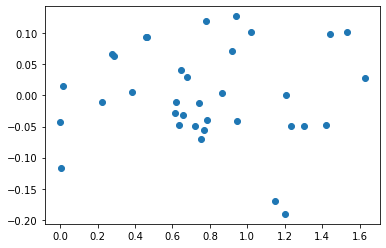

In [37]:
plt.scatter(X_train['R&D Spend'],res)
plt.show()

In [38]:
# Dividing test set into x and y
y_test = df_test.pop('Profit')
X_test = df_test

In [39]:
# prediction on train set

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test['R&D Spend'])

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_3.predict(X_test_sm)
y_test_pred.head()


6     1.644681
36    0.718735
37    0.853374
28    1.045478
43    0.603742
dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.12415075758881597

In [41]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9180698548847864

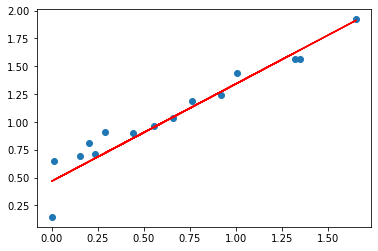

In [42]:
plt.scatter(X_test['R&D Spend'], y_test)
plt.plot(X_test['R&D Spend'], 0.468 + 0.874 * X_test['R&D Spend'], 'r')
plt.show()